# Hijerarhisko klasterovanje

In [1]:
import pandas as pd

In [2]:
import numpy as np

## Podaci

In [3]:
df = pd.read_csv("../data/dogs.csv")
df.head()

,breed,height,weight
0,Border Collie,20,45
1,Boston Terrier,16,20
2,Brittany Spaniel,18,35
3,Bullmastiff,27,120
4,Chihuahua,8,8


In [4]:
features = df.columns[1:]
features

Index(['height', 'weight'], dtype='object')

In [5]:
X = df[features]
y = df["breed"]
print(X.shape)
print(y.shape)

(11, 2)
(11,)


## Preprocesiranje

In [6]:
from sklearn.preprocessing import MinMaxScaler

In [7]:
scaler = MinMaxScaler()
X = pd.DataFrame(scaler.fit_transform(X), columns=features)
X.head()

,height,weight
0,0.538462,0.248366
1,0.384615,0.084967
2,0.461538,0.183007
3,0.807692,0.738562
4,0.076923,0.006536


## Treniranje modela

In [8]:
from sklearn.cluster import AgglomerativeClustering

In [9]:
model = AgglomerativeClustering(n_clusters=3, linkage="single")

In [10]:
model.fit(X)

AgglomerativeClustering(linkage='single', n_clusters=3)

Dodeljene oznake klastera za svaku od instanci:

In [11]:
model.labels_

array([0, 0, 0, 0, 2, 0, 0, 1, 0, 0, 2])

Izvršena spajanja:

In [12]:
model.children_

array([[ 0,  8],
       [ 4, 10],
       [ 6,  5],
       [11,  2],
       [14,  9],
       [15,  1],
       [16, 13],
       [17,  3],
       [18, 12],
       [19,  7]])

## Vizualizacija rezultata

In [13]:
import matplotlib.pyplot as plt

Na sledećem dijagramu je prikazana razlika klasterovanja sa različitim funkcijama rastojanja:

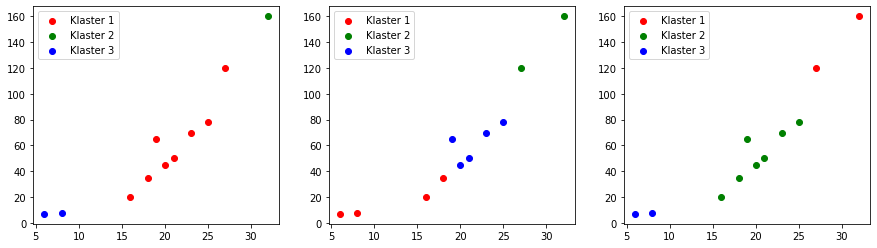

In [14]:
colors = ["red", "green", "blue"]
fig = plt.figure(figsize=(15, 4))

n_clusters = 3

for i, link in enumerate(["single", "complete", "average"]):
    
    model = AgglomerativeClustering(n_clusters=3, linkage=link)
    model.fit(X)
    
    df["label"] = model.labels_
    
    fig.add_subplot(1, n_clusters, i + 1)
    
    for cluster_label in range(n_clusters):
        cluster = df[df["label"] == cluster_label]
        
        plt.scatter(cluster["height"], cluster["weight"], color=colors[cluster_label], marker="o")
        
    plt.legend([f"Klaster {j + 1}" for j in range(n_clusters)])

## Dendrogram

### Dendrogram u Scipy biblioteci

In [15]:
from scipy.cluster.hierarchy import dendrogram, linkage

In [16]:
df.set_index("breed", inplace=True)
df.head()

,height,weight,label
breed,,,
Border Collie,20,45,1
Boston Terrier,16,20,1
Brittany Spaniel,18,35,1
Bullmastiff,27,120,0
Chihuahua,8,8,2


In [17]:
Z = linkage(X)
print(Z.shape)

(10, 4)


In [18]:
Z

array([[ 0.        ,  8.        ,  0.05047034,  2.        ],
       [ 4.        , 10.        ,  0.07720025,  2.        ],
       [ 5.        ,  6.        ,  0.09301156,  2.        ],
       [ 2.        , 11.        ,  0.10094068,  3.        ],
       [ 9.        , 14.        ,  0.1246148 ,  4.        ],
       [ 1.        , 15.        ,  0.1246148 ,  5.        ],
       [13.        , 16.        ,  0.15167269,  7.        ],
       [ 3.        , 17.        ,  0.28508383,  8.        ],
       [12.        , 18.        ,  0.31753116, 10.        ],
       [ 7.        , 19.        ,  0.32454896, 11.        ]])

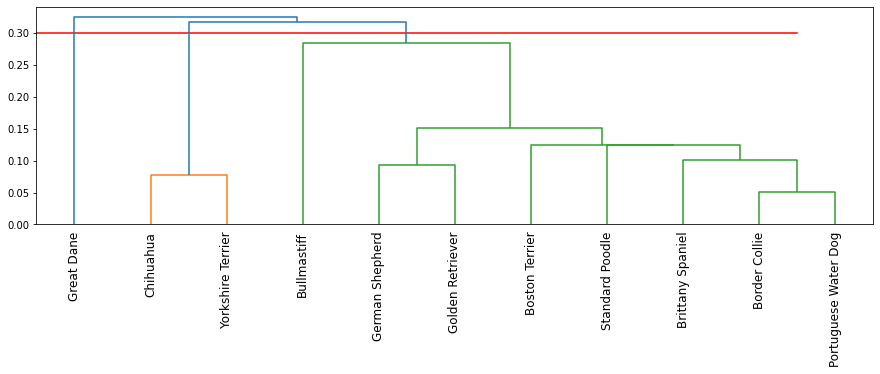

In [19]:
fig = plt.figure(figsize=(15, 4))
plt.plot([0,100], [0.3, 0.3], color="red")
dendrogram(Z, labels=df.index, leaf_rotation=90, color_threshold=0.3)
plt.show()

### Dendrogram u SkLearn biblioteci

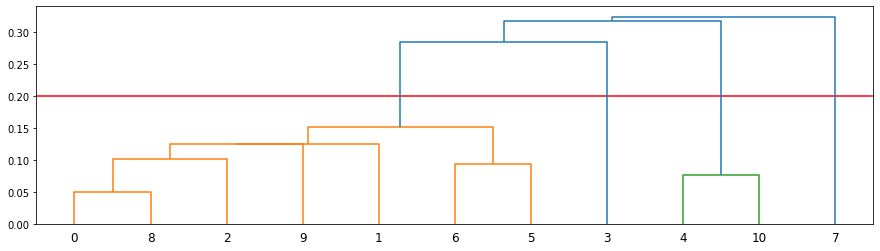

In [20]:
model = AgglomerativeClustering(n_clusters=None, linkage="single", distance_threshold=0)
model.fit(X)

counts = np.zeros(model.children_.shape[0])
n_samples = len(model.labels_)

for i, merge in enumerate(model.children_):
    current_count = 0
    for child_idx in merge:
        if child_idx < n_samples:
            current_count += 1
        else:
            current_count += counts[child_idx - n_samples]
    counts[i] = current_count
    
linkage_matrix = np.column_stack([model.children_, model.distances_, counts])

fig = plt.figure(figsize=(15,4))
plt.plot([0, 200], [0.2, 0.2], color="red")
dendrogram(linkage_matrix, color_threshold=0.2)
plt.show()